In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import factorial
import scipy.stats as stats 
from scipy.stats import poisson
import math as m
from sklearn.cluster import KMeans

In [2]:
df = pd.read_table('pmm_q1.tsv', header=None)
x = df.iloc[:, 0].to_numpy()
n = x.shape[0]

c:\Users\denni\anaconda3\envs\bioinformatics\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


lambda 1 estimate:  0.7375390072297227
lambda 2 estimate:  12.507870389639601
lambda 3 estimate:  5.641730205162249
pi 1 estimate:  0.4869699615905446
pi 2 estimate:  0.24885739732535558
pi 3 estimate:  0.2641726410840963


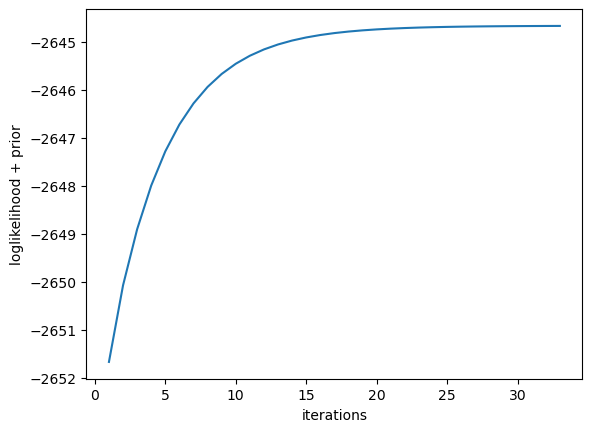

In [3]:
l1prev = l2prev = None
eta = 2
beta = 2
alpha = [2, 2, 2]
a = alpha[0]
K = 3
w = np.zeros((n, K))
eps = 1e-3  # Convergence threshold
max_iter = n

# init via k-means
kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(np.reshape(x, (-1, 1)))
l = kmeans.cluster_centers_.flatten().tolist()

pis = np.zeros((3,))
for i in range(K):
    pis[i] = np.sum(kmeans.labels_ == i) / n

# Visualization
llikelihoods = []
iters = [] 

it = 0
ll = prev_ll = None
while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
    
    # E-step
    for i in range(K):
        w[:, i] = pis[i] * poisson.pmf(x, l[i])
    w /= w.sum(axis=1)[:, None]

    # M-step 
    for i in range(K):
        l[i] = (eta - 1 + x.dot(w[:, i])) / (beta + sum(w[:, i]))
        pis[i] = (alpha[i] - 1 + sum(w[:, i])) / (sum(alpha) - K + n)

    it += 1
    prev_ll = ll

    p_xz = np.zeros(w.shape)
    for i in range(K):
        p_xz[:, i] = pis[i] * poisson.pmf(x, l[i])

    # The actual ll 
    prior = np.sum(np.log(stats.gamma.pdf(l, eta, scale=(1/beta)))) +  np.log(stats.dirichlet.pdf(pis, alpha))
    ll = prior + np.sum(np.log(p_xz.sum(axis=1)))

    # For the Visual
    llikelihoods.append(ll)
    iters.append(it)

plt.plot(iters, llikelihoods)
plt.xlabel("iterations")
plt.ylabel("loglikelihood + prior")
print("lambda 1 estimate: ", l[0])
print("lambda 2 estimate: ", l[1])
print("lambda 3 estimate: ", l[2])

print("pi 1 estimate: ", pis[0])
print("pi 2 estimate: ", pis[1])
print("pi 3 estimate: ", pis[2])

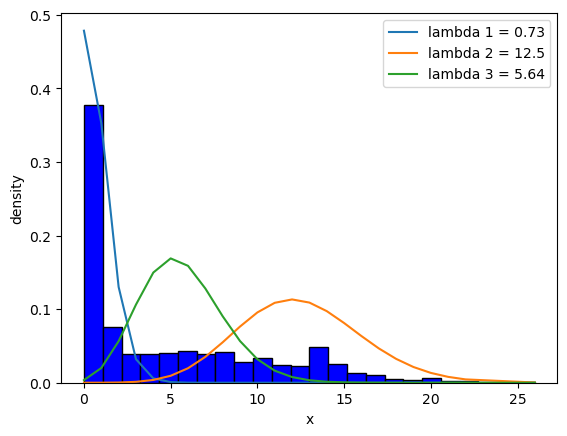

In [17]:
x_ = np.unique(x)
y1 = poisson.pmf(x_, mu=l[0])
y2 = poisson.pmf(x_, mu=l[1])
y3 = poisson.pmf(x_, mu=l[2])
plt.hist(x, color = 'blue', edgecolor = 'black', density=True, bins=x_.shape[0])
s1="lambda 1 = " + str(l[0])[0:4]
s2="lambda 2 = " + str(l[1])[0:4]
s3="lambda 3 = " + str(l[2])[0:4]
plt.plot(x_, y1, label=s1)
plt.plot(x_, y2, label=s2)
plt.plot(x_, y3, label=s3)
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.show()



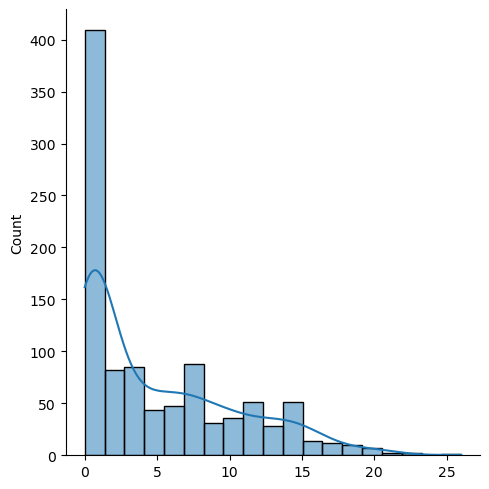

In [5]:
import seaborn as sns
# TODO: add labels
sns.displot(x, kde=True)